<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/11_NLP_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [20]:
import numpy as np
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1 . Load data

In [0]:
data = pd.read_csv('news.csv')

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# 2 . Preprocessing data

In [0]:
def create_corpus(attr):
    corpus = []
    for i in range(len(data)):
        review = re.sub('[^a-zA-Z]', ' ', data[attr][i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [0]:
corpus_title = create_corpus('title')
corpus_text = create_corpus('text')

In [6]:
print('Orginal:\n', data['title'][20])
print('After prprocessing:\n', corpus_title[20])

Orginal:
 The slippery slope to Trump’s proposed ban on Muslims
After prprocessing:
 slipperi slope trump propos ban muslim


In [7]:
print('Orginal:\n', data['text'][20])
print('After prprocessing:\n', corpus_text[20])

Orginal:
 With little fanfare this fall, the New York developer who had planned to build an Islamic community center north of the World Trade Center announced that he would instead use the site for a 70-story tower of luxury condos.

Those who had rallied in opposition to the building because of its religious affiliation back in 2010 were exultant. “The importance of the defeat of the Ground Zero Mosque cannot be overstated,” Pamela Geller, president of the American Freedom Defense Initiative, wrote on the website Breitbart in September. “The Ground Zero Mosque became a watershed issue in our effort to raise awareness of and ultimately halt and roll back the advance of Islamic law and Islamic supremacism in America.”

It’s all well and good that so many Republicans have condemned Donald Trump’s reprehensible call for “a total and complete shutdown of Muslims entering the United States.” House Speaker Paul D. Ryan (Wis.) was particularly forceful, calling proper attention to the “many M

In [0]:
cv = CountVectorizer(max_features = 1500)

In [0]:
X_1 = cv.fit_transform(corpus_title).toarray()
X_2 = cv.fit_transform(corpus_text).toarray()
X = np.concatenate((X_1, X_2), axis = 1)

In [78]:
X_1[20]

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
le = preprocessing.LabelEncoder()
y = data.iloc[:, -1].values
y = le.fit_transform(y)

In [32]:
len(corpus_text)

6335

In [33]:
X.shape[1]

3000

# 3 . Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# 4 . Train model

Decison Tree

In [0]:
model_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [0]:
model_tree = model_tree.fit(X_train, y_train)

Logistic Regression

In [0]:
model_log = LogisticRegression(random_state = 0)

In [38]:
model_log.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Support Vector Machine

In [0]:
model_SVM = SVC(kernel = 'linear', random_state = 0)

In [40]:
model_SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# 5 . Evaluate model

Decision Tree

In [0]:
y_train_pred = model_tree.predict(X_train)
y_test_pred = model_tree.predict(X_test)

In [65]:
print('Classification report in Train data:\n', classification_report(y_train, y_train_pred))
print('Classification report in Test data:\n', classification_report(y_test, y_test_pred))

Classification report in Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2549
           1       1.00      1.00      1.00      2519

    accuracy                           1.00      5068
   macro avg       1.00      1.00      1.00      5068
weighted avg       1.00      1.00      1.00      5068

Classification report in Test data:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       615
           1       0.83      0.84      0.83       652

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



Confusion matrix in Test data: 
 [[2549    0]
 [   0 2519]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

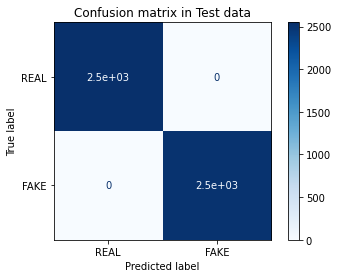

In [66]:
print('Confusion matrix in Test data: \n', confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model_tree, X_train, y_train, cmap = 'Blues', display_labels = ('REAL', 'FAKE'))
plt.title('Confusion matrix in Test data')

Confusion matrix in Test data: 
 [[500 115]
 [106 546]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

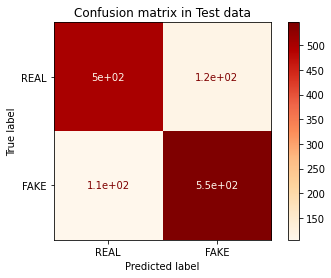

In [67]:
print('Confusion matrix in Test data: \n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model_tree, X_test, y_test, cmap = 'OrRd', display_labels = ('REAL', 'FAKE'))
plt.title('Confusion matrix in Test data')

Logistic Regression

In [0]:
y_train_pred = model_log.predict(X_train)
y_test_pred = model_log.predict(X_test)

In [69]:
print('Classification report in Train data:\n', classification_report(y_train, y_train_pred))
print('Classification report in Test data:\n', classification_report(y_test, y_test_pred))

Classification report in Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2549
           1       1.00      1.00      1.00      2519

    accuracy                           1.00      5068
   macro avg       1.00      1.00      1.00      5068
weighted avg       1.00      1.00      1.00      5068

Classification report in Test data:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       615
           1       0.90      0.90      0.90       652

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



Confusion matrix in Train data: 
 [[2549    0]
 [   0 2519]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

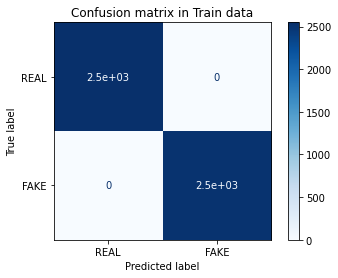

In [70]:
print('Confusion matrix in Train data: \n', confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model_log, X_train, y_train, cmap = 'Blues', display_labels = ('REAL', 'FAKE'))
plt.title('Confusion matrix in Train data')

Confusion matrix in Test data: 
 [[553  62]
 [ 65 587]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

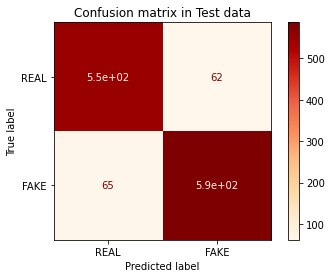

In [71]:
print('Confusion matrix in Test data: \n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model_log, X_test, y_test, cmap = 'OrRd', display_labels = ('REAL', 'FAKE'))
plt.title('Confusion matrix in Test data')

Support Vector Machine

In [0]:
y_train_pred = model_SVM.predict(X_train)
y_test_pred = model_SVM.predict(X_test)

In [73]:
print('Classification report in Train data:\n', classification_report(y_train, y_train_pred))
print('Classification report in Test data:\n', classification_report(y_test, y_test_pred))

Classification report in Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2549
           1       1.00      1.00      1.00      2519

    accuracy                           1.00      5068
   macro avg       1.00      1.00      1.00      5068
weighted avg       1.00      1.00      1.00      5068

Classification report in Test data:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       615
           1       0.89      0.89      0.89       652

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



Confusion matrix in Train data: 
 [[2549    0]
 [   0 2519]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

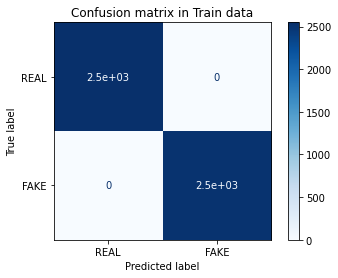

In [76]:
print('Confusion matrix in Train data: \n', confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model_SVM, X_train, y_train, cmap = 'Blues', display_labels = ('REAL', 'FAKE'))
plt.title('Confusion matrix in Train data')

Confusion matrix in Train data: 
 [[541  74]
 [ 74 578]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

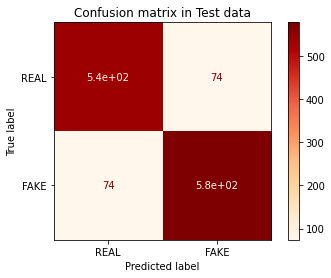

In [77]:
print('Confusion matrix in Train data: \n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model_SVM, X_test, y_test, cmap = 'OrRd', display_labels = ('REAL', 'FAKE'))
plt.title('Confusion matrix in Test data')